Step 1: Load the MNIST dataset

In [14]:
import torch as torch
import torchvision as torchvision
from torch.utils.data import DataLoader, Subset
import torchvision.datasets as datasets
import mnist_loader
from torchvision import transforms

learning_rate = 0.001
#batch_size = 32
keep_prob = 1

def loadDataSets(batch_size):
    global mnist_trainset

    mnist_trainset = datasets.MNIST(root='./data', train=True,
                                download=True,
                                transform=transforms.Compose([transforms.ToTensor()]))

    global train_loader
    train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)





Plot a subset of the Dataset

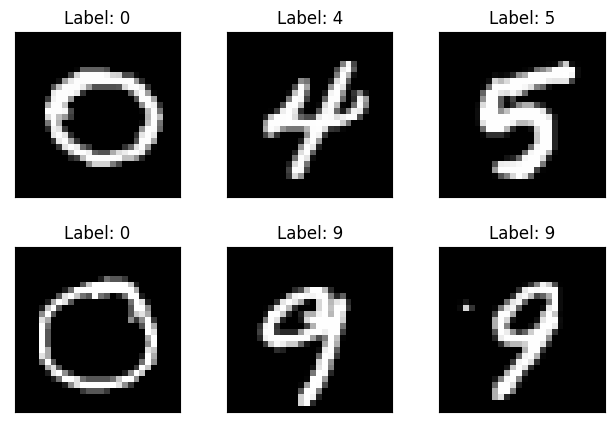

In [37]:
import matplotlib.pyplot as plt

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])


Step 3: Construct Model

In [60]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from torch import nn
import torch.optim as optim

from torch.autograd import Variable



class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16,
                      out_channels=32,
                      kernel_size=5,
                      stride=1,
                      padding=2),
            nn.Sigmoid(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

network = CNN()
print(network)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=network.parameters(), lr=learning_rate)



CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


Step 4: Training the Model

In [74]:
import numpy
from sklearn.model_selection import train_test_split

criterion = torch.nn.CrossEntropyLoss()


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):


    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")

    network.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times

        total_step = len(train_loader)

        for i, (images, labels) in enumerate(train_loader):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output, x = network(b_x)
            loss = loss_fn(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass

        pass


    pass

train(1)

The model will be running on cpu device


KeyboardInterrupt: 

Test Model